In [1]:
import pandas as pd

pf = pd.read_json("price.json")
print(pf.keys)
print(pf['dataset']['column_names'])
print(pf['dataset']['data'])
print(len(pf['dataset']['data']))

<bound method NDFrame.keys of                                                                  dataset
collapse                                                            None
column_index                                                        None
column_names           [Date, Open, High, Low, Last, Change, Settle, ...
data                   [[2018-04-05, 24250.0, 24596.0, 24234.0, 24480...
database_code                                                      CHRIS
database_id                                                          596
dataset_code                                                     CME_YM1
description            Historical Futures Prices: E-mini Dow ($5) Fut...
end_date                                                      2018-04-05
frequency                                                          daily
id                                                              10981347
limit                                                               None
name                 

In [2]:
# contruct training data, settle_y is next day settle price y
original_data = pd.DataFrame(columns= pf['dataset']['column_names'], data = pf['dataset']['data'])
# original_data = original_data.sort_index(axis=1 ,ascending=True)
original_data = original_data.iloc[::-1]
original_data.index = range(len(original_data))

y = original_data.loc[1:2630, ['Settle']]
y.index = range(len(y))

# train_data = pd.concat([original_data, y], axis=1)
train_data = pd.merge(original_data,y , left_index=True, right_index=True)
train_data.drop(['Change'], axis = 1, inplace = True, errors = 'ignore')
train_data

,Date,Open,High,Low,Last,Settle_x,Volume,Previous Day Open Interest,Settle_y
0,2007-10-01,13981.0,14198.0,13963.0,14157.0,14157.00,126582.0,82131.0,14106.00
1,2007-10-02,14152.0,14191.0,14092.0,14106.0,14106.00,164099.0,88574.0,14052.00
2,2007-10-03,14106.0,14116.0,14024.0,14052.0,14052.00,124265.0,87096.0,14041.00
3,2007-10-04,14057.0,14090.0,14026.0,14041.0,14041.00,131584.0,90300.0,14156.00
4,2007-10-05,14029.0,14204.0,14025.0,14156.0,14156.00,87204.0,90779.0,14112.00
5,2007-10-08,14147.0,14164.0,14086.0,14112.0,14112.00,137314.0,93418.0,14237.00
6,2007-10-09,14119.0,14248.0,14095.0,14237.0,14237.00,68308.0,91719.0,14142.00
7,2007-10-10,14228.0,14234.0,14076.0,14142.0,14142.00,126670.0,95249.0,14086.00
8,2007-10-11,14144.0,14267.0,14015.0,14086.0,14086.00,147329.0,92762.0,14179.00
9,2007-10-12,14076.0,14193.0,14038.0,14179.0,14179.00,223193.0,94180.0,14066.00


In [3]:
import pandas as pd
sentiment = pd.read_csv("mean_sentiment14_date.csv")
sentiment.columns=['Date','neg','neu','pos','compound']
sentiment

,Date,neg,neu,pos,compound
0,2011-12-26,0.1316,0.7986,0.0699,-0.22393
1,2011-12-27,0.0928,0.8173,0.0901,0.06701
2,2011-12-28,0.1055,0.8434,0.0509,-0.19519
3,2011-12-29,0.1509,0.8358,0.0132,-0.23619
4,2011-12-30,0.1047,0.8389,0.0564,-0.13520
5,2011-12-31,0.1224,0.7984,0.0793,-0.05395
6,2012-01-01,0.1673,0.7635,0.0693,-0.22919
7,2012-01-02,0.1994,0.7566,0.0440,-0.41134
8,2012-01-03,0.1593,0.8201,0.0206,-0.33805
9,2012-01-04,0.1741,0.8038,0.0221,-0.24281


In [4]:
a = sentiment.merge(train_data, on='Date', how='left')
a
sentiment_combine = a.dropna(how='any')
sentiment_combine.index = range(len(sentiment_combine))
sentiment_combine = sentiment_combine.drop(["Settle_x"],axis=1)
sentiment_combine

,Date,neg,neu,pos,compound,Open,High,Low,Last,Volume,Previous Day Open Interest,Settle_y
0,2012-11-13,0.0976,0.8766,0.0258,-0.23890,12777.0,12855.0,12684.0,12717.00,138310.0,101101.0,12544.00
1,2012-11-14,0.1501,0.8095,0.0404,-0.25605,12731.0,12803.0,12509.0,12544.00,167420.0,101005.0,12522.00
2,2012-11-15,0.1332,0.7952,0.0716,-0.19940,12545.0,12581.0,12464.0,12522.00,152927.0,101319.0,12570.00
3,2012-11-16,0.1469,0.8045,0.0487,-0.21828,12520.0,12573.0,12434.0,12570.00,167779.0,100484.0,12738.00
4,2012-11-19,0.2267,0.7021,0.0712,-0.31749,12579.0,12764.0,12573.0,12738.00,126099.0,94345.0,12759.00
5,2012-11-20,0.1351,0.7699,0.0950,-0.07062,12733.0,12777.0,12666.0,12759.00,122895.0,95051.0,12800.00
6,2012-11-21,0.1228,0.7683,0.1089,0.04511,12757.0,12813.0,12696.0,12800.00,82562.0,95921.0,12961.00
7,2012-11-23,0.1791,0.7749,0.0460,-0.20363,12802.0,12982.0,12801.0,12961.00,61917.0,96069.0,12936.00
8,2012-11-26,0.0941,0.8235,0.0824,0.04249,12949.0,12951.0,12870.0,12936.00,90154.0,94842.0,12862.00
9,2012-11-27,0.1517,0.8031,0.0452,-0.20032,12940.0,12971.0,12845.0,12862.00,125648.0,95474.0,12957.00


In [5]:
import numpy as np
import tensorflow as tf

#define constant variable, hidden layer units and learn rate
rnn_unit=10      
input_size=10      
output_size=1
lr=0.0006    

#getData
data=sentiment_combine.iloc[:,1:12].values


In [6]:
#get training set
def get_train_data(batch_size=60,time_step=20,train_begin=0,train_end=1000):
    batch_index=[]
    data_train=data[train_begin:train_end]
    # Stardardization
    normalized_train_data=(data_train-np.mean(data_train,axis=0))/np.std(data_train,axis=0)  
    train_x,train_y=[],[]   
    for i in range(len(normalized_train_data)-time_step):
       if i % batch_size==0:
           batch_index.append(i)
       x=normalized_train_data[i:i+time_step,:10]
       y=normalized_train_data[i:i+time_step,10,np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-time_step))
    return batch_index,train_x,train_y


#get test set
def get_test_data(time_step=20,test_begin=1300):
    data_test=data[test_begin:]
    mean=np.mean(data_test,axis=0)
    std=np.std(data_test,axis=0)
    normalized_test_data=(data_test-mean)/std  
    size=(len(normalized_test_data)+time_step-1)//time_step  #有size个sample
    test_x,test_y=[],[]
    for i in range(size-1):
       x=normalized_test_data[i*time_step:(i+1)*time_step,:10]
       y=normalized_test_data[i*time_step:(i+1)*time_step,10]
       test_x.append(x.tolist())
       test_y.extend(y)
    test_x.append((normalized_test_data[(i+1)*time_step:,:10]).tolist())
    test_y.extend((normalized_test_data[(i+1)*time_step:,10]).tolist())
    return mean,std,test_x,test_y


#define neural networks parameters
#define input/ouput weight, bias

weights={
         'in':tf.Variable(tf.random_normal([input_size,rnn_unit])),
         'out':tf.Variable(tf.random_normal([rnn_unit,1]))
        }
biases={
        'in':tf.Variable(tf.constant(0.1,shape=[rnn_unit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
       }

#LSTM
def lstm(X):
    
    batch_size=tf.shape(X)[0]
    time_step=tf.shape(X)[1]
    w_in=weights['in']
    b_in=biases['in']
    input=tf.reshape(X,[-1,input_size])  
    input_rnn=tf.matmul(input,w_in)+b_in
    input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
    cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse=tf.get_variable_scope().reuse)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    with tf.variable_scope("rnn14", reuse = None):
        output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
    output=tf.reshape(output_rnn,[-1,rnn_unit]) 
    w_out=weights['out']
    b_out=biases['out']
    pred=tf.matmul(output,w_out)+b_out
    return pred,final_states

#train LSTM

def train_lstm(batch_size=60,time_step=20,train_begin=1000,train_end=1300):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    Y=tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    batch_index,train_x,train_y=get_train_data(batch_size,time_step,train_begin,train_end)
    with tf.variable_scope("sec_lstm14"):
        pred,_=lstm(X)
    loss=tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op=tf.train.AdamOptimizer(lr).minimize(loss)
    saver=tf.train.Saver(tf.global_variables(),max_to_keep=15)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #number of iteration
        for i in range(1000):     
            for step in range(len(batch_index)-1):
                _,loss_=sess.run([train_op,loss],feed_dict={X:train_x[batch_index[step]:batch_index[step+1]],Y:train_y[batch_index[step]:batch_index[step+1]]})
            print("Number of iterations:",i," loss:",loss_)
        print("model_save: ",saver.save(sess,'modle14.ckpt'))
        print("The train has finished")
train_lstm()

Number of iterations: 0  loss: 5.37757
Number of iterations: 1  loss: 4.74617
Number of iterations: 2  loss: 4.21166
Number of iterations: 3  loss: 3.76336
Number of iterations: 4  loss: 3.37
Number of iterations: 5  loss: 3.01263
Number of iterations: 6  loss: 2.68454
Number of iterations: 7  loss: 2.38435
Number of iterations: 8  loss: 2.11243
Number of iterations: 9  loss: 1.8693
Number of iterations: 10  loss: 1.65476
Number of iterations: 11  loss: 1.4677
Number of iterations: 12  loss: 1.30618
Number of iterations: 13  loss: 1.1677
Number of iterations: 14  loss: 1.04952
Number of iterations: 15  loss: 0.94887
Number of iterations: 16  loss: 0.863159
Number of iterations: 17  loss: 0.79005
Number of iterations: 18  loss: 0.727502
Number of iterations: 19  loss: 0.673766
Number of iterations: 20  loss: 0.627372
Number of iterations: 21  loss: 0.587089
Number of iterations: 22  loss: 0.5519
Number of iterations: 23  loss: 0.520963
Number of iterations: 24  loss: 0.493584
Number of 

Number of iterations: 197  loss: 0.0309783
Number of iterations: 198  loss: 0.030811
Number of iterations: 199  loss: 0.0306459
Number of iterations: 200  loss: 0.0304828
Number of iterations: 201  loss: 0.0303219
Number of iterations: 202  loss: 0.030163
Number of iterations: 203  loss: 0.030006
Number of iterations: 204  loss: 0.0298509
Number of iterations: 205  loss: 0.0296977
Number of iterations: 206  loss: 0.0295462
Number of iterations: 207  loss: 0.0293966
Number of iterations: 208  loss: 0.0292486
Number of iterations: 209  loss: 0.0291023
Number of iterations: 210  loss: 0.0289576
Number of iterations: 211  loss: 0.0288145
Number of iterations: 212  loss: 0.0286729
Number of iterations: 213  loss: 0.0285329
Number of iterations: 214  loss: 0.0283943
Number of iterations: 215  loss: 0.0282571
Number of iterations: 216  loss: 0.0281214
Number of iterations: 217  loss: 0.0279871
Number of iterations: 218  loss: 0.0278541
Number of iterations: 219  loss: 0.0277224
Number of iter

Number of iterations: 388  loss: 0.0147474
Number of iterations: 389  loss: 0.0146998
Number of iterations: 390  loss: 0.0146525
Number of iterations: 391  loss: 0.0146052
Number of iterations: 392  loss: 0.0145582
Number of iterations: 393  loss: 0.0145113
Number of iterations: 394  loss: 0.0144645
Number of iterations: 395  loss: 0.0144179
Number of iterations: 396  loss: 0.0143714
Number of iterations: 397  loss: 0.0143251
Number of iterations: 398  loss: 0.0142789
Number of iterations: 399  loss: 0.0142329
Number of iterations: 400  loss: 0.014187
Number of iterations: 401  loss: 0.0141412
Number of iterations: 402  loss: 0.0140956
Number of iterations: 403  loss: 0.0140501
Number of iterations: 404  loss: 0.0140048
Number of iterations: 405  loss: 0.0139596
Number of iterations: 406  loss: 0.0139145
Number of iterations: 407  loss: 0.0138695
Number of iterations: 408  loss: 0.0138247
Number of iterations: 409  loss: 0.01378
Number of iterations: 410  loss: 0.0137354
Number of iter

Number of iterations: 579  loss: 0.00809839
Number of iterations: 580  loss: 0.00807451
Number of iterations: 581  loss: 0.00805073
Number of iterations: 582  loss: 0.00802703
Number of iterations: 583  loss: 0.00800343
Number of iterations: 584  loss: 0.00797991
Number of iterations: 585  loss: 0.00795649
Number of iterations: 586  loss: 0.00793316
Number of iterations: 587  loss: 0.00790992
Number of iterations: 588  loss: 0.00788677
Number of iterations: 589  loss: 0.0078637
Number of iterations: 590  loss: 0.00784073
Number of iterations: 591  loss: 0.00781785
Number of iterations: 592  loss: 0.00779506
Number of iterations: 593  loss: 0.00777236
Number of iterations: 594  loss: 0.00774975
Number of iterations: 595  loss: 0.00772723
Number of iterations: 596  loss: 0.0077048
Number of iterations: 597  loss: 0.00768246
Number of iterations: 598  loss: 0.00766021
Number of iterations: 599  loss: 0.00763806
Number of iterations: 600  loss: 0.00761599
Number of iterations: 601  loss: 0

Number of iterations: 767  loss: 0.00500991
Number of iterations: 768  loss: 0.00499923
Number of iterations: 769  loss: 0.0049886
Number of iterations: 770  loss: 0.004978
Number of iterations: 771  loss: 0.00496744
Number of iterations: 772  loss: 0.00495692
Number of iterations: 773  loss: 0.00494644
Number of iterations: 774  loss: 0.004936
Number of iterations: 775  loss: 0.00492559
Number of iterations: 776  loss: 0.00491523
Number of iterations: 777  loss: 0.0049049
Number of iterations: 778  loss: 0.00489461
Number of iterations: 779  loss: 0.00488435
Number of iterations: 780  loss: 0.00487413
Number of iterations: 781  loss: 0.00486395
Number of iterations: 782  loss: 0.0048538
Number of iterations: 783  loss: 0.00484369
Number of iterations: 784  loss: 0.00483361
Number of iterations: 785  loss: 0.00482357
Number of iterations: 786  loss: 0.00481357
Number of iterations: 787  loss: 0.0048036
Number of iterations: 788  loss: 0.00479367
Number of iterations: 789  loss: 0.00478

Number of iterations: 954  loss: 0.00348554
Number of iterations: 955  loss: 0.00347915
Number of iterations: 956  loss: 0.00347278
Number of iterations: 957  loss: 0.00346642
Number of iterations: 958  loss: 0.00346008
Number of iterations: 959  loss: 0.00345375
Number of iterations: 960  loss: 0.00344743
Number of iterations: 961  loss: 0.00344113
Number of iterations: 962  loss: 0.00343484
Number of iterations: 963  loss: 0.00342857
Number of iterations: 964  loss: 0.0034223
Number of iterations: 965  loss: 0.00341606
Number of iterations: 966  loss: 0.00340982
Number of iterations: 967  loss: 0.0034036
Number of iterations: 968  loss: 0.00339739
Number of iterations: 969  loss: 0.0033912
Number of iterations: 970  loss: 0.00338502
Number of iterations: 971  loss: 0.00337885
Number of iterations: 972  loss: 0.00337269
Number of iterations: 973  loss: 0.00336656
Number of iterations: 974  loss: 0.00336043
Number of iterations: 975  loss: 0.00335432
Number of iterations: 976  loss: 0.

INFO:tensorflow:Restoring parameters from ./modle14.ckpt
PMSE: 0.0171176915278


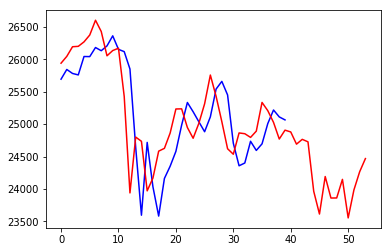

(array([ 25694.08398438,  25843.90039062,  25782.41992188,  25759.84375   ,
         26044.06445312,  26042.51367188,  26182.84570312,  26133.73046875,
         26207.60546875,  26363.18945312,  26154.58398438,  26119.2734375 ,
         25850.67578125,  24639.97851562,  23593.95898438,  24717.84375   ,
         24033.15429688,  23580.50390625,  24161.2578125 ,  24350.55078125,
         24579.73632812,  24985.01171875,  25334.08203125,  25191.39648438,
         25035.78710938,  24882.90234375,  25112.60351562,  25541.66601562,
         25660.01367188,  25450.47265625,  24704.4296875 ,  24356.96484375,
         24399.93164062,  24735.22460938,  24593.98632812,  24695.7734375 ,
         25008.40429688,  25218.27929688,  25111.453125  ,  25065.2421875 ], dtype=float32),
 array([ 25941.  ,  26046.  ,  26195.  ,  26201.  ,  26270.  ,  26376.  ,
         26604.  ,  26430.  ,  26055.  ,  26136.  ,  26172.  ,  25428.  ,
         23938.  ,  24800.  ,  24735.  ,  23970.  ,  24167.  ,  24583.  ,
 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


# #LSTM
# def lstm(X):
    
#     batch_size=tf.shape(X)[0]
#     time_step=tf.shape(X)[1]
#     w_in=weights['in']
#     b_in=biases['in']
#     input=tf.reshape(X,[-1,input_size])  
#     input_rnn=tf.matmul(input,w_in)+b_in
#     input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
#     cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse = True)
#     init_state=cell.zero_state(batch_size,dtype=tf.float32)
#     output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
#     output=tf.reshape(output_rnn,[-1,rnn_unit]) 
#     w_out=weights['out']
#     b_out=biases['out']
#     pred=tf.matmul(output,w_out)+b_out
#     return pred,final_states


# Model prediction
def prediction(time_step=20):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    mean,std,test_x,test_y=get_test_data(time_step)
    with tf.variable_scope("sec_lstm14",reuse=True):
        pred,_=lstm(X)
    saver=tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        #read parameters
        module_file = tf.train.latest_checkpoint('./')
        saver.restore(sess, module_file)
        test_predict=[]
        for step in range(len(test_x)-1):
          prob=sess.run(pred,feed_dict={X:[test_x[step]]})
          predict=prob.reshape((-1))
          test_predict.extend(predict)
        test_y=np.array(test_y)*std[10]+mean[10]
        test_predict=np.array(test_predict)*std[10]+mean[10]
        acc=np.average(np.abs(test_predict-test_y[:len(test_predict)])/test_y[:len(test_predict)])  
        print("PMSE:",acc)
        
        plt.figure()
        plt.plot(list(range(len(test_predict))), test_predict, color='b',)
        plt.plot(list(range(len(test_y))), test_y,  color='r')
        plt.show()
    return test_predict, test_y

prediction()

In [9]:
test_y

NameError: name 'test_y' is not defined